### Load Important Libraries 

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

### Set Working Directory 

In [2]:
os.chdir("C:\\Internships & Projects\\DevStackSolution\\news")

### Load The Data 

In [3]:
data = pd.read_csv('news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Descriptive Statistics 

In [4]:
data.shape 

(6335, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
#Drop The Unnamed Column
data.drop("Unnamed: 0", axis=1, inplace=True)

### Missing Value Analysis 

In [7]:
data.isnull().sum()  #Checking for NaN values

title    0
text     0
label    0
dtype: int64

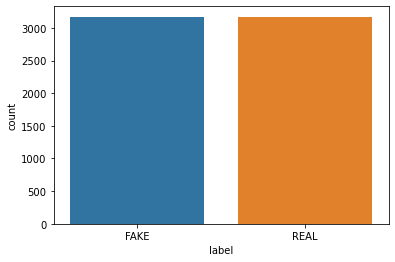

In [8]:
#target Class Diostribution
sns.countplot(data=data, x='label')
plt.show()

###  UsingTfidfVectorizer 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(max_features=3000)
tfidf_text = TfidfVectorizer(max_features=25000)

In [10]:
title = tfidf_title.fit_transform(data['title']).toarray()
text = tfidf_text.fit_transform(data['text']).toarray()

In [11]:
print("Shape of Transformed Title :-> ",title.shape) 
print("Shape of Transformed Text :-> ",text.shape)

Shape of Transformed Title :->  (6335, 3000)
Shape of Transformed Text :->  (6335, 25000)


In [12]:
df_title = pd.DataFrame(title)
df_text = pd.DataFrame(text)

In [13]:
df = pd.concat([df_title, df_text], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Label Encoding the Target Column 

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(data['label'])

### Train Test Split 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=10)

### For Model Evaluation 

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return round(accuracy,4), cf_matrix, round(precision,4)

### ML Algorithm 

### GaussianNB 

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Fit the Model On train Data
gnb.fit(X_train, y_train)

GaussianNB()

#### Evaluation 

In [18]:
gnb_pred = gnb.predict(X_test)
gnb_accuracy, gnb_cf_mat, gnb_precision = evaluate(y_test, gnb_pred)
print("Accuracy : ", gnb_accuracy)
print("Precision Score : ", gnb_precision)
print("Confusion Matrix : ")
print(gnb_cf_mat)

Accuracy :  0.7948
Precision Score :  0.8258
Confusion Matrix : 
[[495 108]
 [152 512]]


### PassiveAggressiveClassifier 

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()

#Fit the Model On train Data
pac.fit(X_train, y_train)

PassiveAggressiveClassifier()

#### Evaluation 

In [20]:
pac_pred = pac.predict(X_test)
pac_accuracy, pac_cf_mat, pac_precision = evaluate(y_test, pac_pred)
print("Accuracy : ", pac_accuracy)
print("Precision Score : ", pac_precision)
print("Confusion Matrix : ")
print(pac_cf_mat)

Accuracy :  0.9353
Precision Score :  0.9533
Confusion Matrix : 
[[573  30]
 [ 52 612]]


#### With accuracy of 93%  PassiveAggressiveClassifier is the best fit model on Data

# Thank You